Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 1 </h2>
    <h1> Mobile Price </h1>
    <p>
        Alumno Larry Uribe<br>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 4 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar




##Introducción

El dataset utilizado es Mobile Price. Este conjunto de datos refleja una serie de características propias de un teléfono móvil.

A continuación, se presentan las variables que están contenidas:

* battery_power: Capacidad de la batería.

* blue: Tiene bluetooth o no.

* clock_speed: Frecuencia del procesador.

* dual_sim: Tiene dual sim o no.

* fc: Megapixeles de la cámara frontal.

* four_g: Tiene 4G o no.

* int_memory: Memoria interna.

* m_dep: Profundidad del teléfono.

* mobile_wt: Peso del teléfono.

* n_cores: Número de procesadores.

* pc: Megapixeles de la cámara trasera.

* px_height: Cantidad de pixeles (alto)

* px_width: Cantidad de pixeles (ancho)

* ram: Memoria RAM

* sc_h: Altura de la pantalla.

* sc_w: Ancho de la pantalla.

* talk_time: Duración de la batería.

* three_g: Tiene 3G o no.

* touch_screen: Tiene pantalla táctil o no.

* wifi: Tiene WIFI o no.

* price_range: Rango de precios (0: low cost, 1: medium cost, 2: high cost y 3: very high cost)




## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (3 puntos)

Cargue el dataset Mobile Price dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos?

RESPUESTA:

In [2]:
import pandas as pd

# Cargar el dataset
url = "https://raw.githubusercontent.com/larryuc/Iic2433/main/Mobile%20Price%20dataset.csv"
data = pd.read_csv(url)

# Indicar la cantidad de filas y columnas
rows, cols = data.shape
print(f"El dataset tiene {rows} filas y {cols} columnas.")

# Verificar si existen datos nulos
null_data = data.isnull().sum()
null_columns = null_data[null_data > 0]
if null_columns.empty:
    print("No hay datos nulos en el dataset.")
else:
    print(f"Las siguientes columnas tienen datos nulos:\n{null_columns}")

# Mostrar las primeras filas del dataset
print(data.head())


El dataset tiene 2000 filas y 21 columnas.
No hay datos nulos en el dataset.
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208     

### 1.2 Describir dataset (9 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las variables:

* battery_power
* ram
* fc
* price_range

Luego, use gráficos y medidas descriptivas para reflejar la relación existente entre cada variable cuantitativa y el nivel de precios (price_range). Comente.

RESPUESTA:

       battery_power          ram           fc  price_range
count    2000.000000  2000.000000  2000.000000  2000.000000
mean     1238.518500  2124.213000     4.309500     1.500000
std       439.418206  1084.732044     4.341444     1.118314
min       501.000000   256.000000     0.000000     0.000000
25%       851.750000  1207.500000     1.000000     0.750000
50%      1226.000000  2146.500000     3.000000     1.500000
75%      1615.250000  3064.500000     7.000000     2.250000
max      1998.000000  3998.000000    19.000000     3.000000


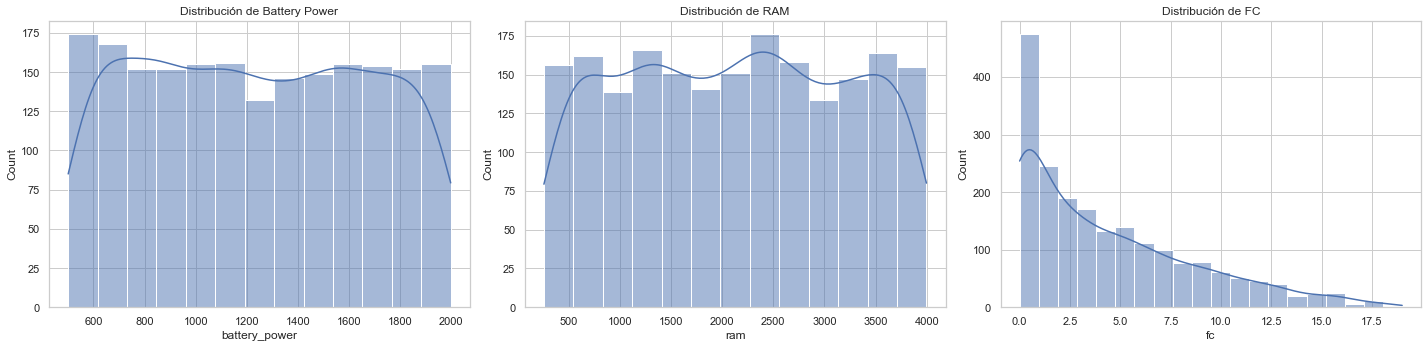

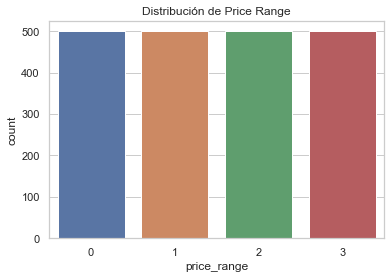

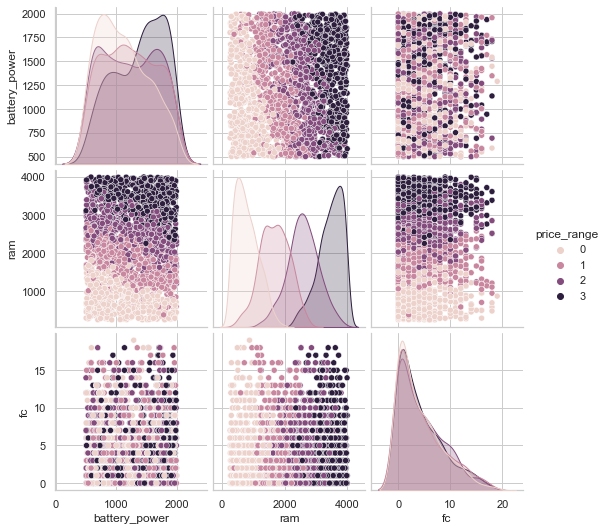

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción estadística de las variables seleccionadas
print(data[['battery_power', 'ram', 'fc', 'price_range']].describe())

# Gráficos de distribución para 'battery_power', 'ram' y 'fc'
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data['battery_power'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Battery Power')

sns.histplot(data['ram'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de RAM')

sns.histplot(data['fc'], kde=True, ax=axes[2])
axes[2].set_title('Distribución de FC')

plt.tight_layout()
plt.show()

# Gráfico de barras para 'price_range'
sns.countplot(x='price_range', data=data)
plt.title('Distribución de Price Range')
plt.show()

# Análisis de la relación entre variables cuantitativas y 'price_range'
sns.pairplot(data, vars=['battery_power', 'ram', 'fc'], hue='price_range')
plt.show()


Los resultados obtenidos:

Imprime una descripción estadística de las variables battery_power, ram, fc, y price_range.

Se crearon gráficos de distribución para las variables battery_power, ram, y fc.

Se creo un gráfico de barras para visualizar la distribución de la variable price_range.

Se creo un gráfico de pares para analizar la relación entre las variables cuantitativas y la variable price_range.



### 1.3 Normalizar datos (8 puntos)

Realice un proceso de normalización, considerando **SOLO** las siguientes variables:

* 'battery_power',
* 'clock_speed',
* 'fc',
* 'int_memory',
* 'm_dep',
* 'mobile_wt',
* 'n_cores',
* 'pc',
* 'px_height',
* 'px_width',
* 'ram',
* 'sc_h',
* 'sc_w',
* 'talk_time'


Explique por qué es útil realizar esta acción.

RESPUESTA:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas a normalizar
columns_to_normalize = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Inicializar el escalador
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Mostrar las primeras filas del dataset normalizado
print(data.head())




### Explicación de la utilidad del proceso de normalización

La normalización es un proceso que ajusta los valores en las columnas numéricas en el dataset a un rango común, generalmente [0, 1]. 
Este proceso es útil porque muchos algoritmos de machine learning son sensibles a la escala de las características. 
Al normalizar las características, podemos ayudar a que los algoritmos converjan más rápidamente a una solución y, a menudo, 
a una mejor solución, ya que todas las características están contribuyendo equitativamente al modelo.


### Bonus: Investigar medida de asociación lineal (3 décimas)

Investigue una medida de asociación lineal entre variables cuantitativas. Describa sus principales características, poniendo énfasis en la interpretación de sus resultados. Luego, calcule la medida respectiva para los datos cuantitativos ya normalizados en el punto 1.3. ¿Qué variables tienen la mayor relación?

RESPUESTA:

Matriz de Correlación de Pearson:
               battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000     0.011482  0.033334   -0.004004  0.034085   
clock_speed         0.011482     1.000000 -0.000434    0.006545 -0.014364   
fc                  0.033334    -0.000434  1.000000   -0.029133 -0.001791   
int_memory         -0.004004     0.006545 -0.029133    1.000000  0.006886   
m_dep               0.034085    -0.014364 -0.001791    0.006886  1.000000   
mobile_wt           0.001844     0.012350  0.023618   -0.034214  0.021756   
n_cores            -0.029727    -0.005724 -0.013356   -0.028310 -0.003504   
pc                  0.031441    -0.005245  0.644595   -0.033273  0.026282   
px_height           0.014901    -0.014523 -0.009990    0.010441  0.025263   
px_width           -0.008402    -0.009476 -0.005176   -0.008335  0.023566   
ram                -0.000653     0.003443  0.015099    0.032813 -0.009434   
sc_h               -0.029959    -0.029078 

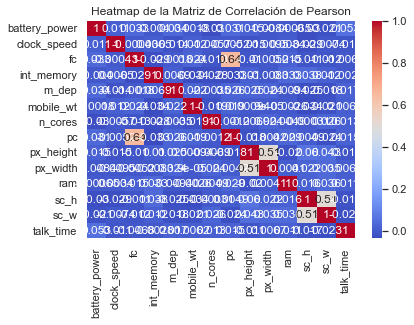

In [6]:
# Lista de columnas a normalizar
columns_to_normalize = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Calcular la matriz de correlación de Pearson
correlation_matrix = data[columns_to_normalize].corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de Correlación de Pearson:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación de Pearson')
plt.show()






### Explicación de la medida de asociación lineal

El coeficiente de correlación de Pearson es una medida de la relación lineal entre dos variables cuantitativas. 
Varía entre -1 y +1, donde +1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, 
y 0 indica que no hay correlación lineal entre las variables. 
Es útil para identificar relaciones lineales potenciales entre variables que pueden ser explotadas en análisis posteriores.



## Parte 2: Reducción de dimensionalidad (15 puntos)

En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con **Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza en función del número de componentes. Comente.

RESPUESTA:

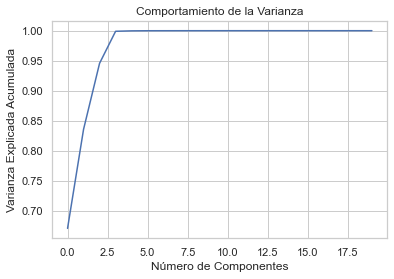

In [8]:
from sklearn.decomposition import PCA
import numpy as np

# Separar las variables independientes y dependientes
X = data.drop('price_range', axis=1)
y = data['price_range']

# Inicializar PCA y ajustar con los datos
pca = PCA()
pca.fit(X)

# Graficar la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(explained_variance_ratio)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Comportamiento de la Varianza')
plt.grid(True)
plt.show()




### 2.2 Retener 90% de la varianza (5 puntos)

PCA debe retener un 90% de la varianza de los datos originales. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

### 2.3 Reducir dimensionalidad a n=6 (5 puntos)

PCA debe construirse con dimensionalidad n=6. Determine la proporción de varianza explicada.

RESPUESTA:

## Parte 3: Detección de outliers (10 puntos)

En esta tercera parte se debe evaluar la existencia de outliers en el conjunto de datos que solo contiene variables cuantitativas. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza).

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1,15, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

## Parte 4: Clasificación (15 puntos)

En esta última sección debe entrenar un clasificador basado en k-nearest neighbors. Para ello, debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.

### 4.1 Separar train y test (4 puntos)

Tomando en consideración el resultado del punto 3.2, separe el conjunto de datos en train (75%) y test (25%). Utilice **price_range** como variable de respuesta (y).

Luego, para y_train e y_test, determine la cantidad de elementos de cada clase.

**Observación:**

Para trabajar con la variable **price_range**, debe eliminar los registros clasificados como atípicos en el dataset original de Mobile Price. Considere que la dimensión del vector **price_range** debe coincidir con el número de filas del conjunto de datos del punto 3.2.

RESPUESTA:

### 4.2 Aplicar clasificador KNeighborsClassifier (7 puntos)

Determine el número de vecinos entre los siguientes valores: 2, 3, 4, 5, 6 y 7. Considere la métrica score para tomar la decisión.

RESPUESTA:

### 4.3 Evaluar clasificador por clase (4 puntos)

Utilizando el mejor clasificador, identificado en el punto 4.2, evalúe el rendimiento por clase.

RESPUESTA: